04 - Post-Cleaning Visualization Analysis

Project: UK Housing Price Paid Records

Purpose: To perform a final visual confirmation that the cleaning, outlier removal, and feature engineering steps (executed in 03_final_prep.py) have prepared the data correctly for modeling. This script loads the cleaned price_paid_model_ready.parquet file and generates key analytical plots (e.g., price distribution, time trends, categorical comparisons) to verify the dataset's integrity and readiness for the machine learning phase.

Team Member(s): Tymo Verhaegen

**Input File:** `../data/housing/processed/price_paid_model_ready.parquet`

Date Last Run: 06/11/2025

--- Starting Post-Cleaning Visualization Analysis ---
1. Loading cleaned data from: ../data/housing/processed/price_paid_model_ready.parquet
   -> Load successful. Records for analysis: 22,489,256

--- 2.1 Price Distribution ---


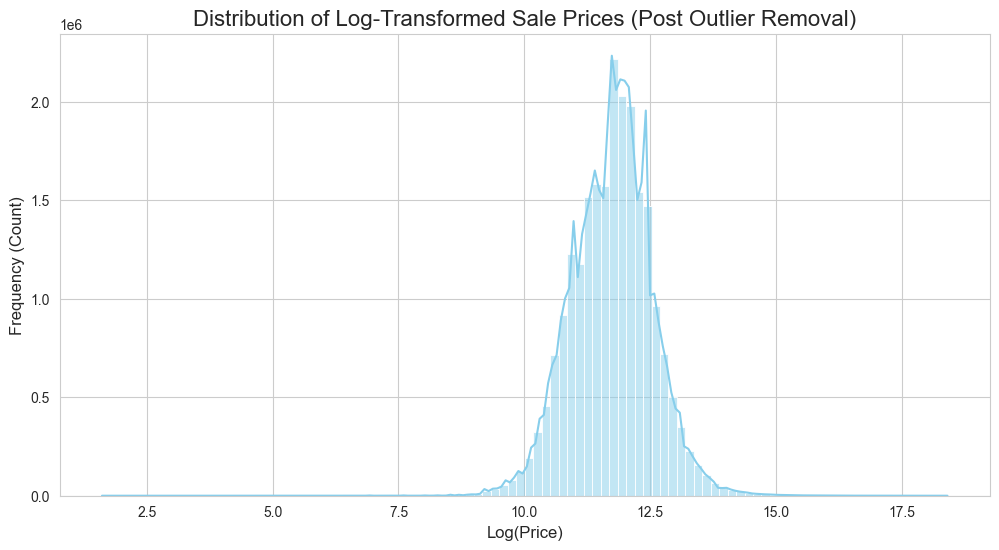


--- 2.2 Median Price Trend Over Time ---


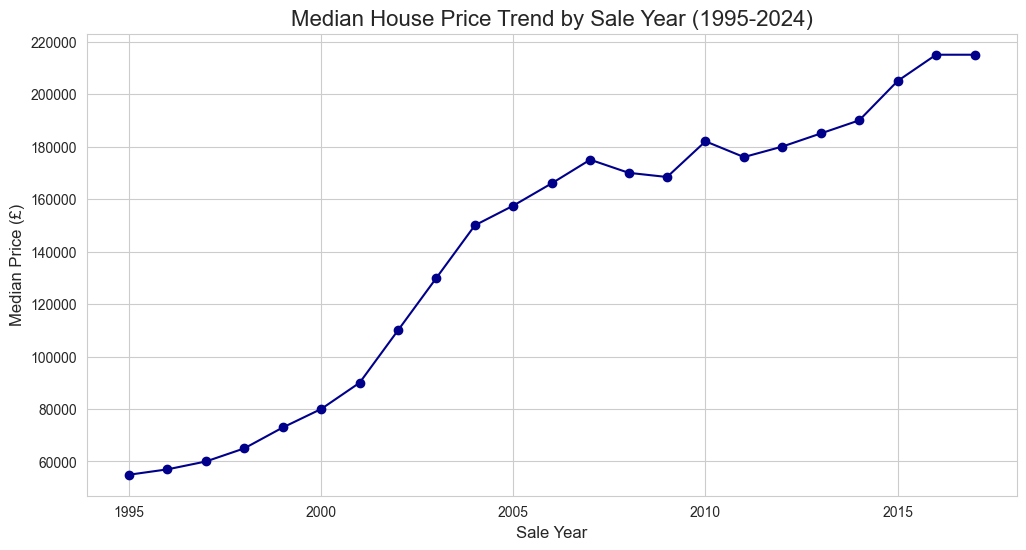


--- 2.3 Price Distribution by Property Type ---


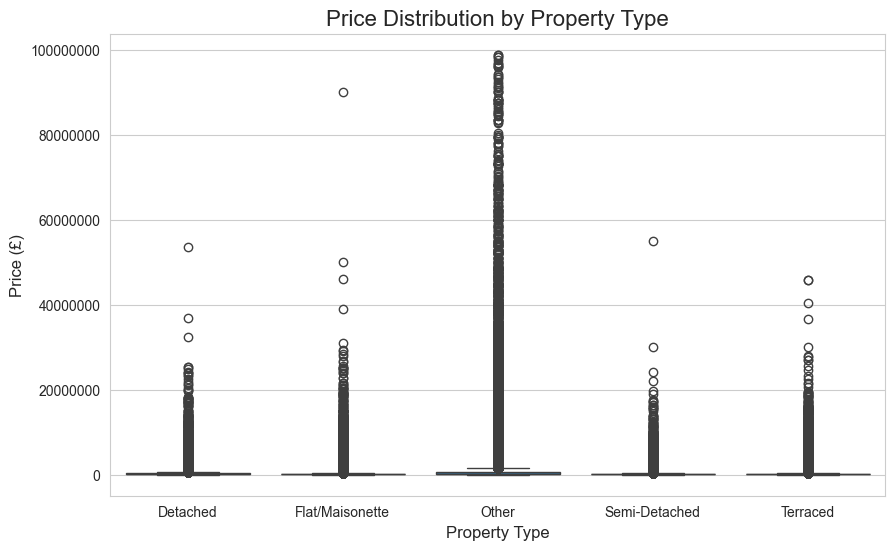


--- Visualization Analysis Complete! ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Settings and Data Loading ---
print("--- Starting Post-Cleaning Visualization Analysis ---")

# Define the path to the model-ready data generated by 03_final_prep.py
parquet_file_path = '../data/housing/processed/price_paid_model_ready.parquet'

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# Load the DataFrame (df) from the cleaned Parquet file
try:
    print(f"1. Loading cleaned data from: {parquet_file_path}")
    df = pd.read_parquet(parquet_file_path)
    print(f"   -> Load successful. Records for analysis: {len(df):,}")
except FileNotFoundError:
    print(f"   -> ERROR: File not found at {parquet_file_path}. Please run 03_final_prep.py first.")
    exit()

# --- 2. Data Analysis (Visualizations) ---

# 2.1 Price Distribution: Check the price distribution after removing the high-value 0.1% outliers.
# Using log transformation (np.log) to handle the heavy positive skew.
print("\n--- 2.1 Price Distribution ---")
plt.figure(figsize=(12, 6))
sns.histplot(np.log(df['price']), bins=100, kde=True, color='skyblue')
plt.title('Distribution of Log-Transformed Sale Prices (Post Outlier Removal)', fontsize=16)
plt.xlabel('Log(Price)', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.show()

# 2.2 Price Trend Over Time: Visualize how the median price has changed annually.
print("\n--- 2.2 Median Price Trend Over Time ---")
median_price_by_year = df.groupby('sale_year')['price'].median()

plt.figure(figsize=(12, 6))
median_price_by_year.plot(kind='line', marker='o', color='darkblue')
plt.title('Median House Price Trend by Sale Year (1995-2024)', fontsize=16)
plt.xlabel('Sale Year', fontsize=12)
plt.ylabel('Median Price (£)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

# 2.3 Price by Property Type: Compare the price distributions across different property types.
print("\n--- 2.3 Price Distribution by Property Type ---")

# Map property codes to full names for readability in the plot
property_map = {'D': 'Detached', 'S': 'Semi-Detached', 'T': 'Terraced', 'F': 'Flat/Maisonette', 'O': 'Other'}
df['property_type_label'] = df['property_type'].map(property_map)

plt.figure(figsize=(10, 6))
# Using boxplot to show distribution (median, IQR, outliers)
sns.boxplot(x='property_type_label', y='price', data=df)
plt.title('Price Distribution by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Clean up the temporary label column (optional, but good practice)
df.drop(columns=['property_type_label'], inplace=True)

print("\n--- Visualization Analysis Complete! ---")